For this section we will be using a beginner friendly dataset to test a simple binary classification task of whether a person will
be interested in learning a new sport based on just two attributes namely, age and interest quotient, that can be downloaded
from Kaggle. With respect to this dataset, implement/report the following:

In [ ]:
#Logistic Regression
import pandas as pd
from google.colab import files
uploaded=files.upload()

Saving classification.csv to classification.csv


In [ ]:
import io
import numpy as np
df=pd.read_csv(io.BytesIO(uploaded['classification.csv']))
print(df.head())

         age   interest  success
0  23.657801  18.859917      0.0
1  22.573729  17.969223      0.0
2  32.553424  29.463651      0.0
3   6.718035  25.704665      1.0
4  14.401919  16.770856      0.0


1. Plot the dataset using different colors for the two classes.

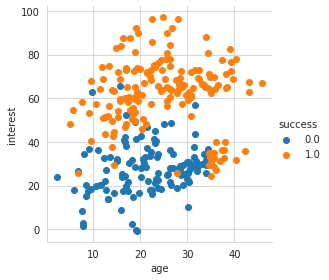

In [ ]:
# Q1) Plot the dataset using different colors for the two classes.
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.FacetGrid(df,hue="success",height=4)\
.map(plt.scatter,"age","interest")\
.add_legend()
plt.show()

2. Implement the least square method for classification and plot the decision boundary. Clearly describe your results. Is the
decision boundary able to classify the points correctly?

In [ ]:
import numpy as np
import math
size=df.size
y=df["success"]
X=df.drop(columns=["success"]).copy()
one_column=[]
for i in range(297):
  one_column.append(1)
X.insert(0, "One", one_column, True)
X=X.to_numpy(dtype='float32')
y=y.to_numpy(dtype='float32')

In [ ]:
def leastsquare(): 
  w=np.dot(np.transpose(X),X)
  w=np.linalg.inv(w)
  w=np.dot(w,np.transpose(X))
  w=np.dot(w,y)
  print(w)
  return w

In [ ]:
w=leastsquare()
line_x = np.linspace(0, 50)
line_y = -(w[0] / w[2]) - ((w[1] / w[2]) * line_x)

[-0.3160168   0.00369176  0.01697316]


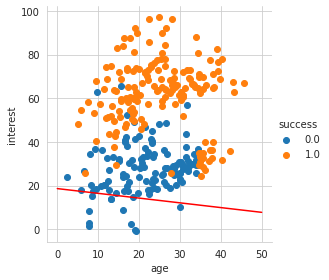

In [ ]:
sns.set_style("whitegrid")
sns.FacetGrid(df,hue="success",height=4)\
.map(plt.scatter,"age","interest")\
.add_legend()
plt.plot(line_x, line_y,color="red")
plt.show()

In [ ]:
rss = np.sum((y - np.dot(X,w)) ** 2)

print("The minimum RSS error is: " + str(rss))

The minimum RSS error is: 30.377165


The Least square method is not appropriate because it considers anomaly points also which deviates the decision boundary from it's actual path, here also the decision boundary obtained from least square method is not classifying the data.

No the decision boundary is not able to classify

In [ ]:
df1=df.copy()
cols=['age','interest']
for i in cols:
  mean_data=np.mean(df[i])
  std_data=np.std(df[i])
  print("mean of",i,"=",mean_data)
  print("standard deviation of",i,"=",std_data)
  print()
  data=[]
  for j in df[i]:
    data.append((j-mean_data)/std_data)
  df[i]=data
print(data)

mean of age = 23.709718193784123
standard deviation of age = 8.849064578694591

mean of interest = 46.98652658762004
standard deviation of interest = 21.919452369947784

[-1.283180314713564, -1.3238151595623695, -0.7994212119590003, -0.9709120812085789, -1.3784865417587695, -1.1506360403628861, 1.2075088607768862, 0.7260485357924622, -0.6653382265384967, 0.5472748741876817, 0.7728882411306989, -0.21221805035142313, -1.2485375472115532, 2.0520458644148594, -0.48296065165711455, 0.6300998911533066, 0.9017673766828147, -1.113691701873162, -0.48659530750777996, -0.6306077163553949, -0.9901503422344129, 1.1929817911564364, 2.259812052300445, -0.5182981713378061, 0.46464193320582753, 0.865703635239253, -1.2997182592305467, -1.1410941767860743, 1.133053584495761, 1.0131526185633646, 1.1540452505963212, -1.3354074030760854, 0.5922518883329284, 1.851292435920172, -0.692336112631589, -0.6553142974801028, 0.8792314048775374, 0.7226511498729115, -1.3192394148618278, 1.0016230412948546, 0.991123305

3. Implement the logistic regression using gradient descent method. Choose the initial values of w in the range [−0.1, 0.1]. Plot
a 3D figure depicting the sigmoid function obtained along with the same color coding of the points. Did the performance
improved as compared to previous question?

In [ ]:
def predict(row, coefficients):
	yhat = coefficients[0]
	for i in range(len(row)-1):
		yhat += coefficients[i + 1] * row[i]
	return 1.0 / (1.0 + np.exp(-yhat))
def coefficients_sgd(data, lr, epoch):
  coef=[]
  for i in range(len(data[0])):
    coef.append(np.random.normal(-1,1)) #choosing the initial values of w in the range [−0.1, 0.1].
  for epoch in range(epoch):
    sigmoid=[]
    sum_error = 0
    for row in data:
      yhat = predict(row, coef)
      sigmoid.append(yhat)
      error = row[-1] - yhat
      sum_error += error**2
      coef[0] = coef[0] + lr * error * yhat * (1.0 - yhat)
      for i in range(len(row)-1):
        coef[i + 1] = coef[i + 1] + lr * error * yhat * (1.0 - yhat) * row[i]
  return coef,sigmoid
lr = 0.01
epoch = 500
data=df.copy()
data=data.to_numpy(dtype='float32')
coef,sigmoid = coefficients_sgd(data, lr, epoch)
print(coef)
print(sigmoid)

[1.1079735447483459, 0.7714720146520851, 3.653386424495574]
[0.02702792638283719, 0.02132371432596463, 0.26085881372030584, 0.01947158343449861, 0.0086810418957621, 0.02558908288228635, 0.9944980602692163, 0.987033344231203, 0.11206077072317601, 0.9751393671555786, 0.9866798856380379, 0.4328318938414447, 0.009965700143107442, 0.9998575886505098, 0.3918526723630044, 0.9469748607088391, 0.9946424901202644, 0.0494467311580977, 0.6361895479993611, 0.4506184664452706, 0.11787795557759484, 0.9978909236443134, 0.999903458291823, 0.6960497871433715, 0.9355625159882826, 0.9941220516753367, 0.027152942186074745, 0.017169448196277345, 0.9971416220612543, 0.99466437387532, 0.9987511261640811, 0.012957924503607447, 0.944086682695069, 0.9993634545992727, 0.37415410248559433, 0.43084828930722846, 0.9956750609426775, 0.9666030417998559, 0.009178410958296171, 0.9960561661072839, 0.9760511448914387, 0.9612536853739274, 0.10669518090260544, 0.41401286835953927, 0.9176306378459461, 0.9909475504815646, 0.9

In [ ]:
X1=df["age"]
X1=X1.to_numpy(dtype='float32')
X2=df["interest"]
X2=X2.to_numpy(dtype='float32')
yhat = 1/(1 + np.exp(-(coef[0] + coef[1] * X1 + coef[2]*X2)))
for i in range(297):
  if(yhat[i]<=0.5):
    yhat[i]=0
  elif(yhat[i]>0.5):
    yhat[i]=1

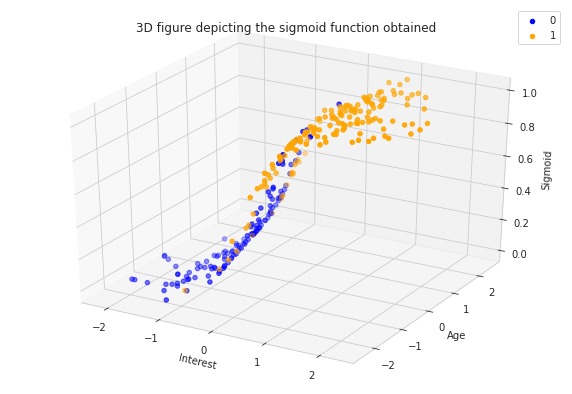

In [ ]:
df["sigmoid"]=sigmoid
df_0=df.loc[df["success"] == 0.0]
df_1=df.loc[df["success"] == 1.0]
X1=df_0["age"]
X1=X1.to_numpy(dtype='float32')
X2=df_0["interest"]
X2=X2.to_numpy(dtype='float32')
sigmoid_0=df_0["sigmoid"]
sigmoid_0=sigmoid_0.to_numpy(dtype='float32')
Y1=df_1["age"]
Y1=Y1.to_numpy(dtype='float32')
Y2=df_1["interest"]
Y2=Y2.to_numpy(dtype='float32')
sigmoid_1=df_1["sigmoid"]
sigmoid_1=sigmoid_1.to_numpy(dtype='float32')

from mpl_toolkits import mplot3d
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
plot1=ax.scatter3D(X2, X1, sigmoid_0, color="blue")
plot2=ax.scatter3D(Y2, Y1, sigmoid_1, color="orange")
ax.set_xlabel('Interest')
ax.set_ylabel('Age')
ax.set_zlabel('Sigmoid')
plt.title("3D figure depicting the sigmoid function obtained")
plt.legend((plot1, plot2),('0', '1'),loc='upper right')
plt.show()

4. Plot the decision boundary obtained for logistic regression.

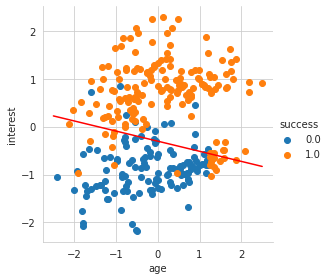

In [ ]:
line_x = np.linspace(-2.5, 2.5)
line_y = -(coef[0] / coef[2]) - ((coef[1] / coef[2]) * line_x)
sns.set_style("whitegrid")
sns.FacetGrid(df,hue="success",height=4)\
.map(plt.scatter,"age","interest")\
.add_legend()
plt.plot(line_x, line_y,color="red")
plt.show()

Yes the performance has improved a lot in comparision to least square method. Now the decision boundary is clearly classifying the data in two halves

5. Find the linear discriminant boundary and describe your results.

In [ ]:
X=df.loc[df1["success"] == 0.0]
Y=df.loc[df1["success"] == 1.0]
m1=np.array([0,0],dtype = 'float')
m1[0]=(np.mean(X["age"]))
m1[1]=(np.mean(X["interest"]))
m2=np.array([0,0],dtype = 'float')
m2[0]=(np.mean(Y["age"]))
m2[1]=(np.mean(Y["interest"]))
diff_mean=m1-m2
diff_mean=np.transpose(diff_mean)
diff_mean=diff_mean.reshape(2,1)
S_b=np.dot(diff_mean,np.transpose(diff_mean))
X_age=X["age"]
X_age=X_age.to_numpy(dtype='float32')
for i in range(X_age.size):
  X_age[i]=X_age[i]-m1[0]
X_interest=X["interest"]
X_interest=X_interest.to_numpy(dtype='float32')
for i in range(X_interest.size):
  X_interest[i]=X_interest[i]-m1[1]
X_age=X_age.tolist()
X_interest=X_interest.tolist()
Z1=np.array([X_age,X_interest])
S_1=np.dot(Z1,np.transpose(Z1))
Y_age=Y["age"]
Y_age=Y_age.to_numpy(dtype='float32')
for i in range(Y_age.size):
  Y_age[i]=Y_age[i]-m2[0]
Y_interest=Y["interest"]
Y_interest=Y_interest.to_numpy(dtype='float32')
for i in range(Y_interest.size):
  Y_interest[i]=Y_interest[i]-m2[1]
Y_age=Y_age.tolist()
Y_interest=Y_interest.tolist()
Z2=np.array([Y_age,Y_interest])
S_2=np.dot(Z2,np.transpose(Z2))
S_w=S_1+S_2
eigval, eigvec = np.linalg.eig(np.dot(np.linalg.inv(S_w),S_b))
eigen_pairs = [[np.abs(eigval[i]),eigvec[:,i]] for i in range(len(eigval))]
eigen_pairs = sorted(eigen_pairs,key=lambda k: k[0],reverse=True)
w = eigen_pairs[0][1][:,np.newaxis].real
print(w)

[[-0.08747043]
 [-0.99616712]]


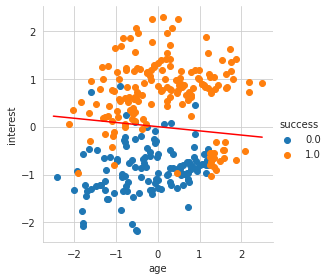

In [ ]:
line_x = np.linspace(-2.5, 2.5)
line_y = -(w[0]/w[1])*line_x
sns.set_style("whitegrid")
sns.FacetGrid(df,hue="success",height=4)\
.map(plt.scatter,"age","interest")\
.add_legend()
plt.plot(line_x, line_y,color="red")
plt.show()

Linear Discriminant Boundary works better than Logistic regression and least square method, Now the decision boundary obtained is more precise and accurate as compared to above two methods.

6. Logistic regression considers only linear decision boundaries. One way to go from linear decision boundaries to non-linear
decision boundaries is by considering polynomial curve of higher degree. For example, if input attributes are x1, x2 then
transforming it into 2 degree polynomial will give features: {x1, x2, x2
1
, x2
2
, x1x2, 1}. Identify an appropriate degree of the
transformation that results in the optimal performance via logistic regression. Clearly explain your choice.

In [ ]:
def mapFeature(X1,X2,degree):
  res=np.ones(X1.shape[0])
  for i in range(1,degree+1):
    for j in range(0,i+1):
      res=np.column_stack((res,(X1**(i-j))*(X2**j)))
  return res

In [ ]:
deg=2
X_train = mapFeature(X1, X2, degree=deg)
lr = 0.01
epoch = 500
coef,sigmoid = coefficients_sgd(X_train, lr, epoch)
coef=np.array(coef)
print(coef)

[-0.62138357 -2.76011728 -0.52571565 -5.48044012 -0.06627447 -0.34502734]


7. Above expansion will result in non-linear decision boundary. Plot the boundary along with the dataset points.

In [ ]:
def plotDecisionBoundary(theta,degree,axes):
  u=np.linspace(-0.8,0.5,50)
  v=np.linspace(0,0.5,50)
  U,V = np.meshgrid(u,v)
  U = np.ravel(U)
  
  V = np.ravel(V)
  Z = np.zeros((len(u) * len(v)))
  X_poly = mapFeature(U, V, degree)
  print(X_poly.shape)
  #X_poly = np.hstack((np.ones((X_poly.shape[0],1)),X_poly))
  Z = X_poly.dot(theta)
  
  U = U.reshape((len(u), len(v)))
  V = V.reshape((len(u), len(v)))
  Z = Z.reshape((len(u), len(v)))
  print(Z.shape)
  cs = axes.contour(Z,U,V,levels=[0],cmap= "Greys_r")
  axes.legend(labels=['class 1', 'class 0', 'Decision Boundary'])
  return cs

(2500, 6)
(50, 50)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: No contour levels were found within the data range.


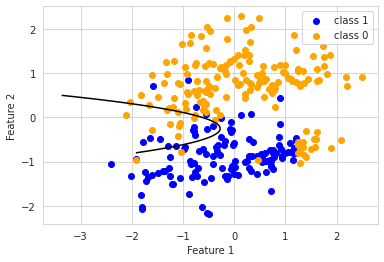

In [ ]:
X=df.loc[df1["success"] == 0.0]
Y=df.loc[df1["success"] == 1.0]
X_age=X["age"]
X_interest=X["interest"]
Y_age=Y["age"]
Y_interest=Y["interest"]
fig, axes = plt.subplots();
axes.set_xlabel('Feature 1')
axes.set_ylabel('Feature 2')
plt.scatter(X_age,X_interest,c='blue',label='class 0')
plt.scatter(Y_age,Y_interest,c='orange',label='class 1')
plotDecisionBoundary(coef,deg,axes)

In [ ]:
deg=3
X_train = mapFeature(X1, X2, degree=deg)
lr = 0.01
epoch = 500
coef,sigmoid = coefficients_sgd(X_train, lr, epoch)
coef=np.array(coef)
print(coef)

[-1.44135935 -2.48458698 -0.77334204  0.8486347  -1.83765323 -1.83597343
 -2.05432328  0.17907499 -0.53053334 -1.26346752]


(2500, 10)
(50, 50)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: No contour levels were found within the data range.


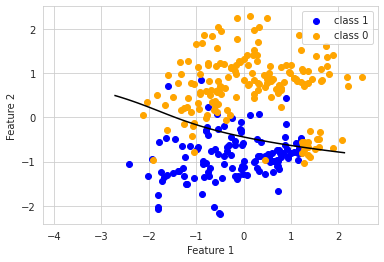

In [ ]:
X=df.loc[df1["success"] == 0.0]
Y=df.loc[df1["success"] == 1.0]
X_age=X["age"]
X_interest=X["interest"]
Y_age=Y["age"]
Y_interest=Y["interest"]
fig, axes = plt.subplots();
axes.set_xlabel('Feature 1')
axes.set_ylabel('Feature 2')
plt.scatter(X_age,X_interest,c='blue',label='class 0')
plt.scatter(Y_age,Y_interest,c='orange',label='class 1')
plotDecisionBoundary(coef,deg,axes)

In [ ]:
deg=4
X_train = mapFeature(X1, X2, degree=deg)
lr = 0.01
epoch = 500
coef,sigmoid = coefficients_sgd(X_train, lr, epoch)
coef=np.array(coef)
print(coef)

[-0.35413343 -3.42056176 -1.21066624 -1.63843085 -1.92752581 -2.02870964
  1.15047691  0.12945227 -2.46203672 -1.64361534 -3.22080104  0.09915221
 -0.05823604 -0.45610662 -0.71330882]


(2500, 15)
(50, 50)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: No contour levels were found within the data range.


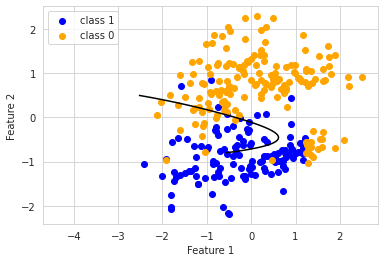

In [ ]:
X=df.loc[df1["success"] == 0.0]
Y=df.loc[df1["success"] == 1.0]
X_age=X["age"]
X_interest=X["interest"]
Y_age=Y["age"]
Y_interest=Y["interest"]
fig, axes = plt.subplots();
axes.set_xlabel('Feature 1')
axes.set_ylabel('Feature 2')
plt.scatter(X_age,X_interest,c='blue',label='class 0')
plt.scatter(Y_age,Y_interest,c='orange',label='class 1')
plotDecisionBoundary(coef,deg,axes)